In [42]:
import pandas as pd
from tiingo import TiingoClient
import matplotlib.pyplot as plt

from feature_util.ohlc import CCIFeatureProducer
from feature_util.ohlc import SimpleMovingAverageFeatureProducer
from feature_util.ohlc import ExponentialMovingAverageFeatureProducer
from feature_util.ohlc import TypicalPriceFeatureProducer

In [5]:
config = {}
config['api_key'] = '56733f153c163e8f3583bafc3f7be6da1ffab289'

client = TiingoClient(config)

In [27]:
historical_qqq = client.get_ticker_price('TSLA', 
                                         fmt='json',
                                         startDate='2016-04-01',
                                         endDate='2018-04-30',
                                         frequency='daily')

In [28]:
def build_ohlc_df(raw):
    index = [d['date'] for d in raw]
    datetimeindex = pd.DatetimeIndex(data=index)
    data = [{'open': d['adjOpen'], 'high': d['adjHigh'], 'low': d['adjLow'], 'close': d['adjClose'], 'volume': d['adjVolume']} for d in raw]
    return pd.DataFrame(data=data, index=datetimeindex)

In [29]:
qqq_df = build_ohlc_df(historical_qqq)

In [30]:
qqq_df

,close,high,low,open,volume
2016-04-01,237.590,247.9000,233.2500,244.8250,15997509
2016-04-04,246.990,252.1200,243.6400,249.1200,13475327
2016-04-05,255.470,256.5600,240.0000,240.5000,9948699
2016-04-06,265.420,267.7400,253.4500,253.9700,11705479
2016-04-07,257.200,269.3400,254.5100,266.4500,8856171
2016-04-08,250.070,260.8200,248.0201,260.5000,7363935
2016-04-11,249.920,258.9900,245.3000,251.0000,9161693
2016-04-12,247.820,251.8000,243.6300,249.5000,5763208
2016-04-13,254.530,255.5000,247.3300,248.5100,4925595
2016-04-14,251.860,256.8390,251.0501,253.0000,4132185


In [43]:
cci_producer = CCIFeatureProducer()
qqq_cci_df = cci_producer.produce(qqq_df)

sma_producer = SimpleMovingAverageFeatureProducer(period=20)
ema_producer = ExponentialMovingAverageFeatureProducer(period=20)

qqq_cci_df = sma_producer.produce(qqq_cci_df)
qqq_cci_df = ema_producer.produce(qqq_cci_df)

tp_producer = TypicalPriceFeatureProducer()
qqq_cci_df = tp_producer.produce(qqq_cci_df)

In [44]:
qqq_cci_df

,close,high,low,open,volume,tp,tp_sma,abs_sma_diff,mad,cci_value,cci,close_sma_20,close_ema_20
2016-04-01,237.590,247.9000,233.2500,244.8250,15997509,239.580000,NaN,NaN,NaN,NaN,NaN,NaN,237.590000
2016-04-04,246.990,252.1200,243.6400,249.1200,13475327,247.583333,NaN,NaN,NaN,NaN,NaN,NaN,242.525000
2016-04-05,255.470,256.5600,240.0000,240.5000,9948699,250.676667,NaN,NaN,NaN,NaN,NaN,NaN,247.278326
2016-04-06,265.420,267.7400,253.4500,253.9700,11705479,262.203333,NaN,NaN,NaN,NaN,NaN,NaN,252.515547
2016-04-07,257.200,269.3400,254.5100,266.4500,8856171,260.350000,NaN,NaN,NaN,NaN,NaN,NaN,253.648676
2016-04-08,250.070,260.8200,248.0201,260.5000,7363935,252.970033,NaN,NaN,NaN,NaN,NaN,NaN,252.893739
2016-04-11,249.920,258.9900,245.3000,251.0000,9161693,251.403333,NaN,NaN,NaN,NaN,NaN,NaN,252.331479
2016-04-12,247.820,251.8000,243.6300,249.5000,5763208,247.750000,NaN,NaN,NaN,NaN,NaN,NaN,251.551647
2016-04-13,254.530,255.5000,247.3300,248.5100,4925595,252.453333,NaN,NaN,NaN,NaN,NaN,NaN,252.029389
2016-04-14,251.860,256.8390,251.0501,253.0000,4132185,253.249700,NaN,NaN,NaN,NaN,NaN,NaN,252.003881


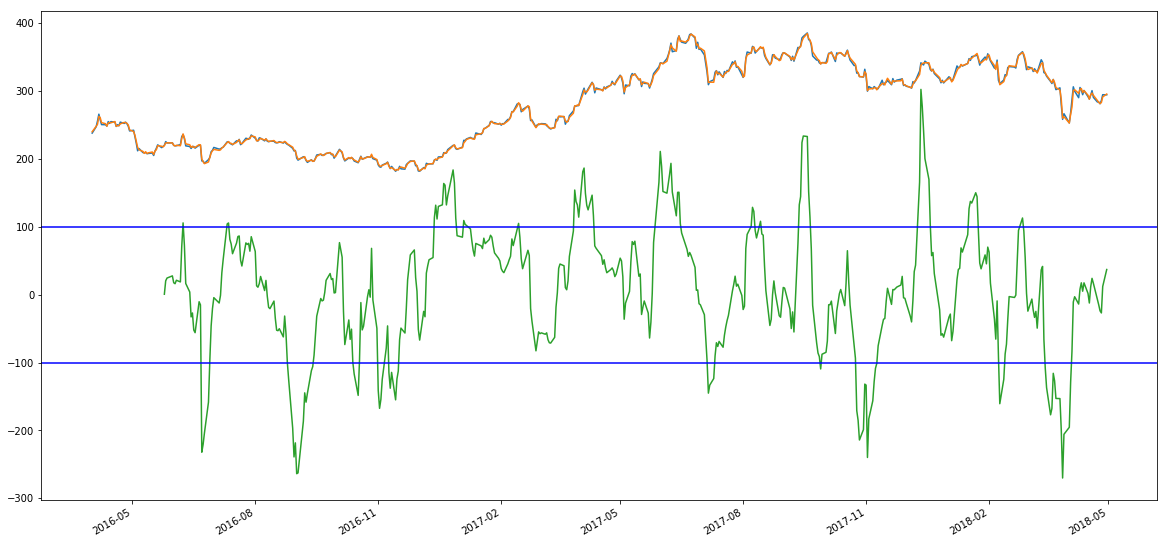

In [49]:
plt.figure(figsize=(20,10))
fig = qqq_cci_df['close'].plot()
plt.plot(qqq_cci_df['tp'])
plt.plot(qqq_cci_df['cci_value'])
plt.axhline(y=100, color='b', linestyle='-')
plt.axhline(y=-100, color='b', linestyle='-')
plt.show()

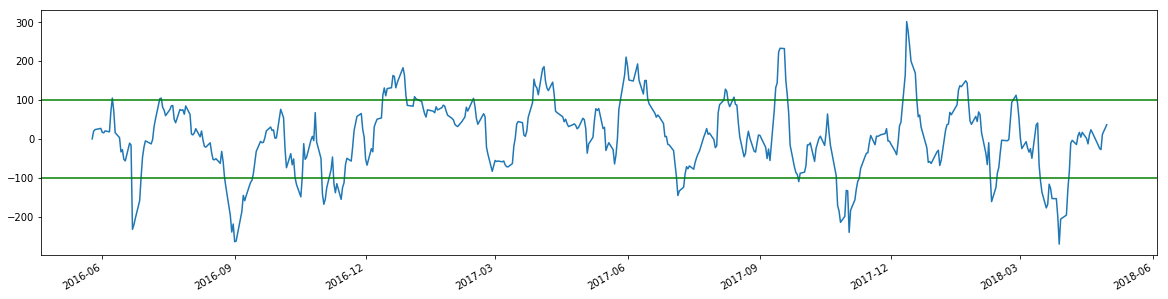

In [34]:
plt.figure(figsize=(20,5))
fig = qqq_cci_df['cci_value'].plot()
plt.axhline(y=100, color='g', linestyle='-')
plt.axhline(y=-100, color='g', linestyle='-')
plt.show()